https://medium.com/analytics-vidhya/train-a-custom-yolov4-tiny-object-detector-using-google-colab-b58be08c9593

In [1]:
##not needed if you clone the github repository
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/pjkirby31/parking-spot-finder-with-drone.git

In [2]:
#this is where yolov4 is located
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15316, done.
remote: Total 15316 (delta 0), reused 0 (delta 0), pack-reused 15316
Receiving objects: 100% (15316/15316), 13.72 MiB | 15.21 MiB/s, done.
Resolving deltas: 100% (10406/10406), done.


In [ ]:
!mkdir Dataset
%cd /content/Dataset
#downloading the PKLot dataset from Roboflow
!wget https://public.roboflow.com/ds/XVOgR0qH9V?key=BY6gurfuE0  -O dataset.zip
!unzip dataset.zip

#only need these weights if you are training from scratch
#they are yolov4-tiny weights so we can do transfer learning
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [ ]:
#only do this to create train.txt
!python3 /content/gdrive/MyDrive/Parking_Spot/process.py

In [ ]:
#idrk what this does but it does something with building darknet
#to run without GPU maybe change the stuff here
%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
# !sed -i 's/GPU=0/GPU=1/' Makefile
# !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

!make

In [ ]:
#this runs the training
!./darknet detector train /content/gdrive/MyDrive/Parking_Spot/obj.data /content/gdrive/MyDrive/Parking_Spot/yolov4-tiny-custom.cfg /content/Dataset/yolov4-tiny.conv.29  -dont_show -map

In [4]:
#this shows the image
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 GPU isn't used 
 OpenCV version: 3.2.0
mini_batch = 1, batch = 4, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    640 x 640 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       3 x 3/ 1    160 x 160 x  64 ->  160 x 160 x  64 1.887 BF
   3 route  2 		                       1/2 ->  160 x 160 x  32 
   4 conv     32       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  32 0.472 BF
   5 conv     32       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  32 0.472 BF
   6 route  5 4 	                           ->  160 x 160 x  64 
   7 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   8 route  2 7 	                           ->  160 x 160 x 128 
   9 max                2x 2/ 2    160 x 160 x 128 ->   80 x  80 x 128 0.003 BF
  10 conv    128       3 x 3/ 1     80 x  80 x 128 ->   80 x  80 x 128 1.887 BF
  11

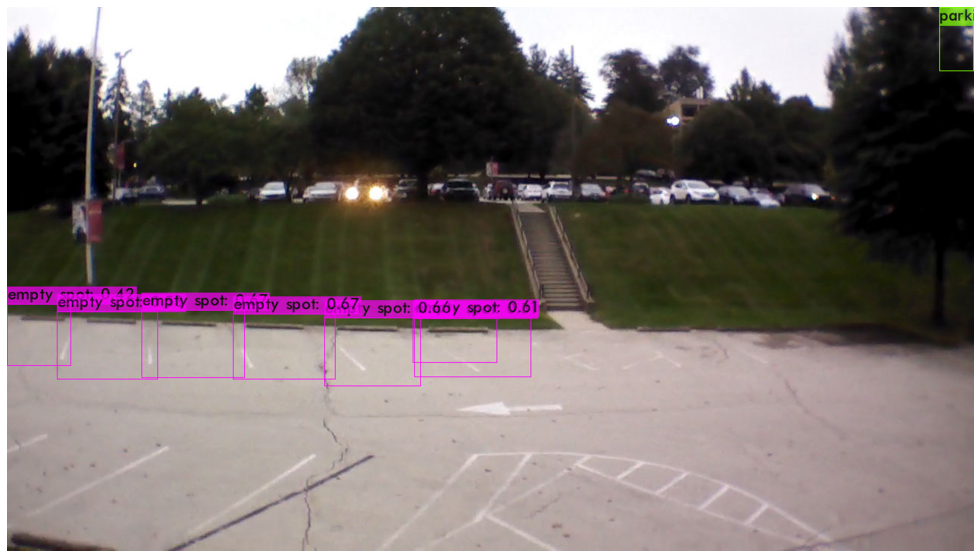

In [5]:
#this runs the detector and makes bounding boxes
!./darknet detector test /content/gdrive/MyDrive/Parking_Spot/obj.data /content/gdrive/MyDrive/Parking_Spot/yolov4-tiny-custom.cfg /content/gdrive/MyDrive/Parking_Spot/yolov4-tiny-custom_best.weights /content/gdrive/MyDrive/Parking_Spot/frame25990.png -thresh 0.3
imShow('predictions.jpg')